In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
from IPython.display import Image

## 분류분석 개요

In [2]:
titanic_df = pd.read_csv('Dataset/Titanic.csv')
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [4]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [5]:
embark_dict = {'S':1, 'C':2, 'Q':3}
sex_dict = {'male':1, 'female':0}
titanic_df['Embarked'] = titanic_df['Embarked'].map(embark_dict)
titanic_df['Sex'] = titanic_df['Sex'].map(sex_dict)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,1,0
1,1,0,38.0,1,0,71.2833,2,1
2,3,0,26.0,0,0,7.9250,1,1
3,1,0,35.0,1,0,53.1000,1,1
4,3,1,35.0,0,0,8.0500,1,0


In [6]:
# devide independent variables and label
X = titanic_df.iloc[:, :-1].values
y = titanic_df.iloc[:, -1].values
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  2.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  0.    , 30.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  2.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  3.    ]])

In [7]:
# declare classifier object and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# make predictions
knn_pred = knn.predict(X)

In [8]:
print('Accuracy: ', round(accuracy_score(y, knn_pred),3))
print('Precision:', round(precision_score(y, knn_pred),3))
print('Recall: ', round(recall_score(y, knn_pred),3))
print('F1 Score:', round(f1_score(y, knn_pred),3))

Accuracy:  0.808
Precision: 0.788
Recall:  0.679
F1 Score: 0.73


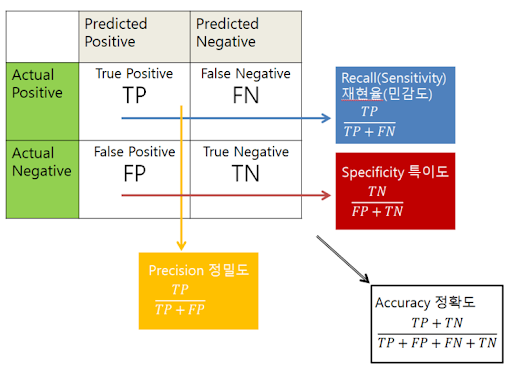

In [9]:
confusion_matrix(y, knn_pred)

array([[487,  62],
       [109, 231]], dtype=int64)

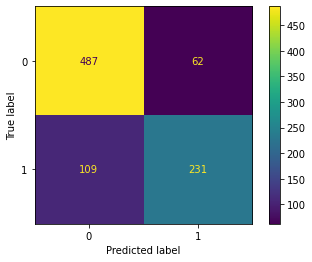

In [10]:
plot_confusion_matrix(knn, X, y)

In [11]:
probs = knn.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)

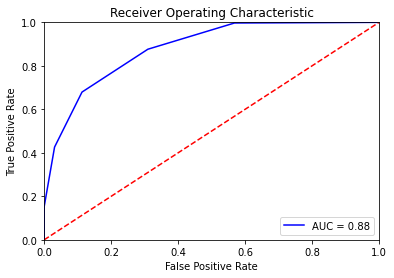

In [12]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# https://www.it-swarm.dev/ko/python/python%EC%97%90%EC%84%9C-roc-%EA%B3%A1%EC%84%A0%EC%9D%84-%EA%B7%B8%EB%A6%AC%EB%8A%94-%EB%B0%A9%EB%B2%95/1048726952/

### 실습: iris data로 정확도, confustion matrix 도출

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

In [14]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
iris_df['target'] = iris_df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
X_iris = iris_df.iloc[:, :-1].values
y_iris = iris_df.iloc[:, -1].values

In [16]:
# declare classifier object and train the model
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_iris, y_iris)


# make predictions
knn_iris_pred = knn.predict(X_iris)

In [17]:
print('정확도: ', round(accuracy_score(y_iris, knn_iris_pred),3))

정확도:  0.967


In [18]:
confusion_matrix(y_iris, knn_iris_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

### train/test 분리 진행

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state= 1229)

In [20]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (711, 7)
X_test shape: (178, 7)
y_train shape: (711,)
y_test shape: (178,)


In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
train_pred_knn = knn.predict(X_train)
test_pred_knn = knn.predict(X_test)

In [24]:
print('#'*3, 'train data confusion matrix', '#'*3)
confusion_matrix(y_train, train_pred_knn)

### train data confusion matrix ###


array([[376,  64],
       [ 82, 189]], dtype=int64)

In [25]:
print('#'*3, 'tests data confusion matrix', '#'*3)
confusion_matrix(y_test, test_pred_knn)

### tests data confusion matrix ###


array([[80, 29],
       [27, 42]], dtype=int64)

In [26]:
print('Train Data')
print('Accuracy: ', round(accuracy_score(y_train, train_pred_knn),3))
print('Precison:', round(precision_score(y_train, train_pred_knn),3))
print('Recall: ', round(recall_score(y_train, train_pred_knn),3))
print('F1 Score:', round(f1_score(y_train, train_pred_knn),3))

Train Data
Accuracy:  0.795
Precison: 0.747
Recall:  0.697
F1 Score: 0.721


In [27]:
print('Test Data')
print('Accuracy: ', round(accuracy_score(y_test, test_pred_knn),3))
print('Precison:', round(precision_score(y_test, test_pred_knn),3))
print('Recall: ', round(recall_score(y_test, test_pred_knn),3))
print('F1 Score:', round(f1_score(y_test, test_pred_knn),3))

Test Data
Accuracy:  0.685
Precison: 0.592
Recall:  0.609
F1 Score: 0.6


### 실습: iris 데이터 train/test dataset 나눠서 각각 정확도 구해보기

In [28]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris,
                                                                        y_iris,
                                                                        test_size=0.2,
                                                                        random_state= 1229)

In [29]:
# declare classifier object and train the model
knn_iris = KNeighborsClassifier(n_neighbors = 5)

knn_iris.fit(X_iris,y_iris)

KNeighborsClassifier()

In [30]:
iris_train_pred = knn_iris.predict(X_iris_train)
iris_test_pred = knn_iris.predict(X_iris_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_iris_train, iris_train_pred),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_iris_test, iris_test_pred),3))

Train Data
정확도:  0.958
Test Data
정확도:  1.0


## 로지스틱 리그레션

In [31]:
from sklearn.linear_model import LogisticRegression

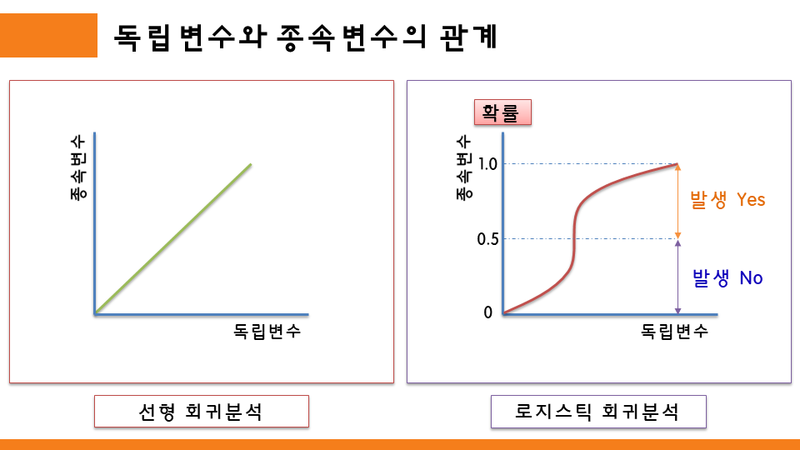

In [32]:
logistic = LogisticRegression()
logistic.fit(X, y)

C:\Users\PIAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [34]:
print('회귀계수:', logistic.coef_)
print('Accuracy:', round(logistic.score(X, y),3))

회귀계수: [[-1.09572500e+00 -2.58220084e+00 -4.07305004e-02 -3.31911337e-01
  -3.58005182e-02  2.04387749e-03  2.59728672e-01]]
Accuracy: 0.802


In [35]:
pred_logistic = logistic.predict(X)

print('Accuracy: ', round(accuracy_score(y, pred_logistic),3))
print('Recall: ', round(recall_score(y, pred_logistic),3))
print('Precision:', round(precision_score(y, pred_logistic),3))
print('F1 Score:', round(f1_score(y, pred_logistic),3))

Accuracy:  0.802
Recall:  0.703
Precision: 0.761
F1 Score: 0.731


In [36]:
confusion_matrix(y, pred_logistic)

array([[474,  75],
       [101, 239]], dtype=int64)

### 실습: iris data train/test 나눠서 logistic regression 진행

In [37]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris,
                                                                        y_iris,
                                                                        test_size=0.2,
                                                                        random_state= 1229)

In [38]:
logistic_iris = LogisticRegression()
logistic.fit(X_iris_train, y_iris_train)


iris_train_pred = logistic.predict(X_iris_train)
iris_test_pred = logistic.predict(X_iris_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_iris_train, iris_train_pred),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_iris_test, iris_test_pred),3))

Train Data
정확도:  0.975
Test Data
정확도:  1.0


C:\Users\PIAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 트리 모형

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

pred_tree = tree.predict(X)

In [41]:
print(tree.predict_proba([[1,1,9,1,0,20,1]]))
print(tree.predict([[1,1,26,1,0,20,1]]))


[[1. 0.]]
[0]


In [42]:
print('Accuracy: ', round(accuracy_score(y, pred_tree),3))
print('Recall: ', round(recall_score(y, pred_tree),3))
print('Precision:', round(precision_score(y, pred_tree),3))
print('F1 Score:', round(f1_score(y, pred_tree),3))

Accuracy:  0.98
Recall:  0.953
Precision: 0.994
F1 Score: 0.973


In [43]:
confusion_matrix(y, pred_tree)

array([[547,   2],
       [ 16, 324]], dtype=int64)

#### overfitting 주의!

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1229)

In [45]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
train_pred_tree = tree.predict(X_train)
test_pred_tree = tree.predict(X_test)

In [47]:
confusion_matrix(y_train, train_pred_tree)

array([[439,   1],
       [ 13, 258]], dtype=int64)

In [48]:
confusion_matrix(y_test, test_pred_tree)

array([[84, 25],
       [21, 48]], dtype=int64)

In [49]:
print('Train Data')
print('Accuracy: ', round(accuracy_score(y_train, train_pred_tree),3))
print('Precision:', round(precision_score(y_train, train_pred_tree),3))
print('Recall: ', round(recall_score(y_train, train_pred_tree),3))
print('F1 Score:', round(f1_score(y_train, train_pred_tree),3))

Train Data
Accuracy:  0.98
Precision: 0.996
Recall:  0.952
F1 Score: 0.974


In [50]:
print('Test Data')
print('Accuracy: ', round(accuracy_score(y_test, test_pred_tree),3))
print('Precision:', round(precision_score(y_test, test_pred_tree),3))
print('Recall: ', round(recall_score(y_test, test_pred_tree),3))
print('F1 Score:', round(f1_score(y_test, test_pred_tree),3))

Test Data
Accuracy:  0.742
Precision: 0.658
Recall:  0.696
F1 Score: 0.676


### 복잡한 트리는 기존에 있는 데이터들은 잘 예측하나, 새로운 데이터는 잘 예측하지 못하고 있음

### 적당한 가지에서 잘라내야함, pruning

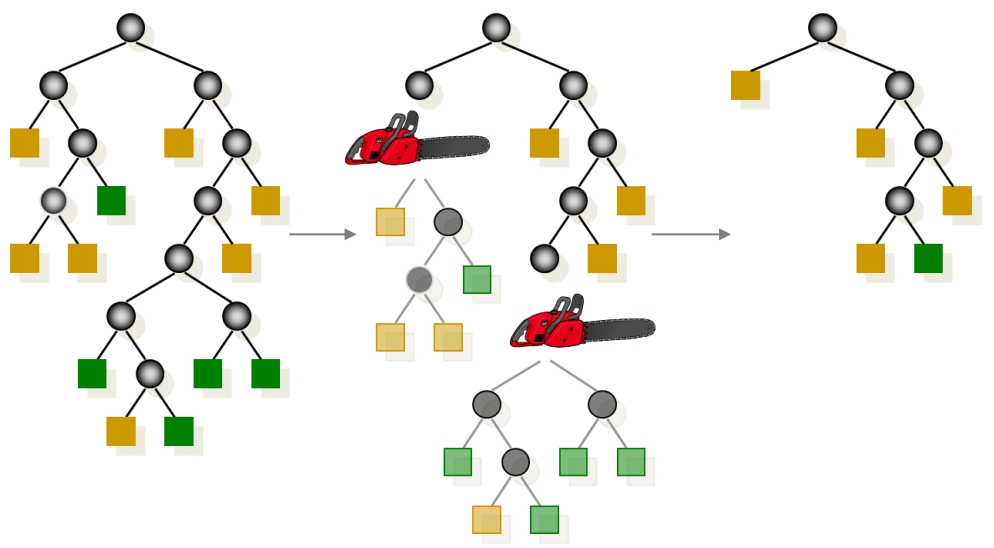

In [51]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

criterion의 default값은 gini  
max_depth: 트리의 최대 깊이  
min_samples_split: 분할되기 위해 노드가 가져야 하는 최소 샘플의 수  
min_samples_leaf: 리프 노드(자식이 없는 노드)가 가지고 있어야할 최소 샘플 수

In [52]:
trimed_tree = DecisionTreeClassifier(max_depth=3)
trimed_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [53]:
train_pred_trimed = trimed_tree.predict(X_train)
test_pred_trimed = trimed_tree.predict(X_test)

cv_tree = DecisionTreeClassifier(max_depth = 3)
cv_score_tree = cross_val_score(cv_tree, X_train, y_train, cv=5, scoring="accuracy")

print(f"교차 검증 점수: {cv_score_tree}".format(cv_score_tree.mean()))
print("교차 검증 평균 점수: {:.2f}".format(cv_score_tree.mean()))

교차 검증 점수: [0.8041958  0.78873239 0.73239437 0.8028169  0.76760563]
교차 검증 평균 점수: 0.78


In [54]:
confusion_matrix(y_train, train_pred_trimed)

array([[386,  54],
       [ 77, 194]], dtype=int64)

In [55]:
confusion_matrix(y_test, test_pred_trimed)

array([[93, 16],
       [15, 54]], dtype=int64)

In [56]:
print('Train Data')
print('Accuracy: ', round(accuracy_score(y_train, train_pred_trimed),3))
print('Precision:', round(precision_score(y_train, train_pred_trimed),3))
print('Recall: ', round(recall_score(y_train, train_pred_trimed),3))
print('F1 Score:', round(f1_score(y_train, train_pred_trimed),3))

Train Data
Accuracy:  0.816
Precision: 0.782
Recall:  0.716
F1 Score: 0.748


In [57]:
print('Test Data')
print('Accuracy: ', round(accuracy_score(y_test, test_pred_trimed),3))
print('Precision:', round(precision_score(y_test, test_pred_trimed),3))
print('Recall: ', round(recall_score(y_test, test_pred_trimed),3))
print('F1 Score:', round(f1_score(y_test, test_pred_trimed),3))

Test Data
Accuracy:  0.826
Precision: 0.771
Recall:  0.783
F1 Score: 0.777


In [58]:
tree_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
tree_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
train_pred_entropy = tree_entropy.predict(X_train)
test_pred_entropy = tree_entropy.predict(X_test)

In [60]:
print('Train Data')
print('Accuracy: ', round(accuracy_score(y_train, train_pred_entropy),3))
print('Precision:', round(precision_score(y_train, train_pred_entropy),3))
print('Recall: ', round(recall_score(y_train, train_pred_entropy),3))
print('F1 Score:', round(f1_score(y_train, train_pred_entropy),3))

Train Data
Accuracy:  0.835
Precision: 0.829
Recall:  0.716
F1 Score: 0.768


In [61]:
print('Test Data')
print('Accuracy: ', round(accuracy_score(y_test, test_pred_entropy),3))
print('Precision:', round(precision_score(y_test, test_pred_entropy),3))
print('Recall: ', round(recall_score(y_test, test_pred_entropy),3))
print('F1 Score:', round(f1_score(y_test, test_pred_entropy),3))

Test Data
Accuracy:  0.848
Precision: 0.828
Recall:  0.768
F1 Score: 0.797


### iris data 트리기반 모형으로 예측해보기

In [62]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris,
                                                    y_iris,
                                                    test_size=0.2,
                                                    random_state=1229)

In [63]:
tree_iris = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
tree_iris.fit(X_iris_train,y_iris_train)

iris_train_pred = tree_iris.predict(X_iris_train)
iris_test_pred = tree_iris.predict(X_iris_test)

print('Train Data')
print('Accuracy: ', round(accuracy_score(y_iris_train, iris_train_pred),3))
print('Test Data')
print('Accuracy: ', round(accuracy_score(y_iris_test, iris_test_pred),3))

Train Data
Accuracy:  0.967
Test Data
Accuracy:  1.0


In [64]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

#### 심화과정: 그리드서치

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12, 15],
     'min_samples_split': [3,6,9,12], 'min_samples_leaf': [2,3,4,5]}, 
  ]

tree_grid = DecisionTreeClassifier(random_state=1229)

grid_search = GridSearchCV(tree_grid, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1229),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        15],
                          'min_samples_leaf': [2, 3, 4, 5],
                          'min_samples_split': [3, 6, 9, 12]}],
             return_train_score=True, scoring='accuracy')

In [66]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [67]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=3, random_state=1229)

In [68]:
cvres = grid_search.cv_results_
for accuracy, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(accuracy, params)

0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 9}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 12}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 3}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 6}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 9}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 12}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.7763124199743918 {'criterion': 'gini', 'max_depth': 1, 'min_

In [69]:
tree_best = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       random_state=1229)
tree_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       random_state=1229)

In [70]:
train_pred_best = tree_best.predict(X_train)
test_pred_best = tree_best.predict(X_test)

In [71]:
print('Train Data')
print('Accuracy: ', round(accuracy_score(y_train, train_pred_best),3))
print('Precison:', round(precision_score(y_train, train_pred_best),3))
print('Recall: ', round(recall_score(y_train, train_pred_best),3))
print('F1 Score:', round(f1_score(y_train, train_pred_best),3))

Train Data
Accuracy:  0.814
Precison: 0.781
Recall:  0.712
F1 Score: 0.745


In [72]:
print('Test Data')
print('Accuracy: ', round(accuracy_score(y_test, test_pred_best),3))
print('Precision:', round(precision_score(y_test, test_pred_best),3))
print('Recall: ', round(recall_score(y_test, test_pred_best),3))
print('F1 Score:', round(f1_score(y_test, test_pred_best),3))

Test Data
Accuracy:  0.826
Precision: 0.771
Recall:  0.783
F1 Score: 0.777


### 트리 기반 회귀

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
df = pd.read_csv('Dataset/Boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [75]:
Input= df.iloc[:,:-1]
Output = df.iloc[:,-1]

In [76]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Input, Output)

DecisionTreeRegressor()

In [77]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"mse", "friedman_mse", "mae"}, default="mse"
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential s

In [78]:
Output_hat = tree_reg.predict(Input)

print('R^2: ', tree_reg.score(Input, Output))
print('MSE: ', mean_squared_error(Output,Output_hat))

R^2:  1.0
MSE:  0.0


In [79]:
Input_train, Input_test, Output_train, Output_test = train_test_split(Input,
                                                    Output,
                                                    test_size=0.2,
                                                    random_state=1229)

In [80]:
tree_reg.fit(Input_train, Output_train)

Output_train_hat = tree_reg.predict(Input_train)
print('train셋 MSE: ', mean_squared_error(Output_train,Output_train_hat))
print('train셋 R^2: ', tree_reg.score(Input_train, Output_train))

Output_test_hat = tree_reg.predict(Input_test)
print('*' *30)
print('test셋 MSE:', mean_squared_error(Output_test,Output_test_hat))
print('test셋 R^2: ', tree_reg.score(Input_test, Output_test))

train셋 MSE:  0.0
train셋 R^2:  1.0
******************************
test셋 MSE: 45.54441176470588
test셋 R^2:  0.39721107688684687


#### 그리드 서치를 이용해서 하이퍼파라미터를 설정할 수 있음

## 앙상블

### 랜덤포레스트

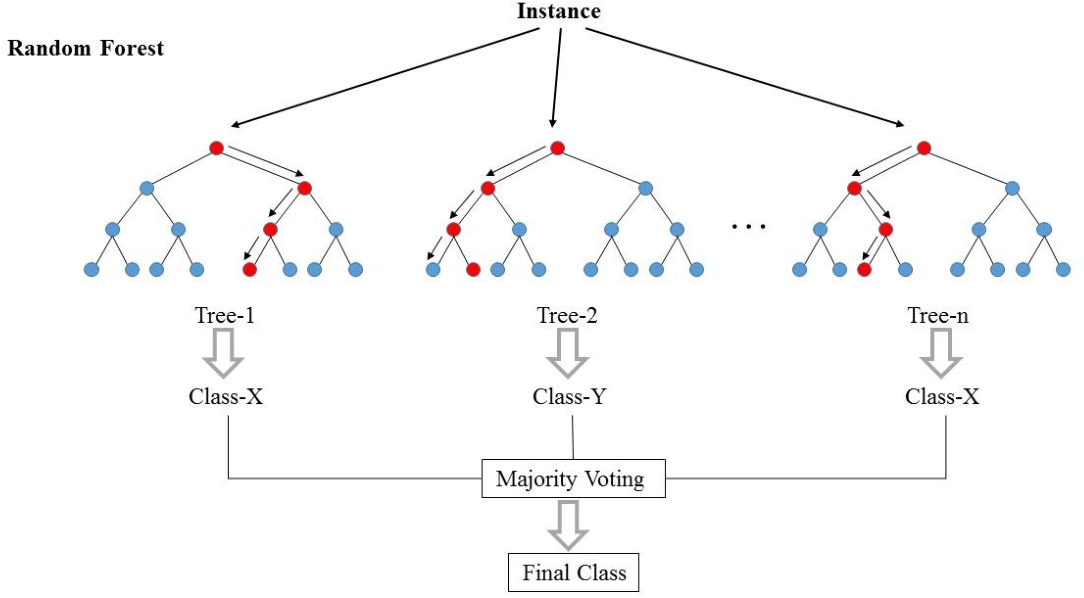

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
train_pred_randomforest = randomforest.predict(X_train)
test_pred_randomforest = randomforest.predict(X_test)

In [84]:
print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_randomforest),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_randomforest),3))

Train Data
정확도:  0.98
Test Data
정확도:  0.826


In [85]:
help(recall_score)

Help on function recall_score in module sklearn.metrics._classification:

recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the recall
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : list, optional
        The set of labels to include when ``average != 'binary'``, and their
        order if ``ave

### iris데이터 randomforest 진행하여 test data 정확도 구하기

In [86]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris,
                                                    y_iris,
                                                    test_size=0.2,
                                                    random_state=1229)

In [87]:
randomforest.fit(X_iris_train, y_iris_train)

train_pred_rf = randomforest.predict(X_iris_train)
test_pred_rf = randomforest.predict(X_iris_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_iris_train, train_pred_rf),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_iris_test, test_pred_rf),3))

Train Data
정확도:  1.0
Test Data
정확도:  1.0


In [88]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

n_estimators: 생성할 tree의 갯수   
max_features: 최대 선택할 특성의 수 (전체 특성 선택시 무작위성 들어가지 않음) ('auto', 'sqrt', 'log2')  
n_jobs = -1 지정시 컴퓨터의 모든 코어 사용

In [89]:
import time
start = time.time()  # 시작 시간 저장

param_grid = [
    {'n_estimators': [100,200,300,400,500], 'max_features': ['auto', 'log2']},
  ]

randomforest_grid = RandomForestClassifier(random_state=1229)

grid_search = GridSearchCV(randomforest_grid, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print("time :", time.time() - start)  # 실행 시간 = 현재시각 - 시작시간 

time : 28.928963899612427


연산 횟수 = 5 * 2 * 5  
생성되는 총 트리 개수 = (100 + 200 + 300 + 400 + 500) * 2 * 5

In [90]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 'auto', 'n_estimators': 500}
RandomForestClassifier(n_estimators=500, random_state=1229)


In [91]:
randomforest_best = RandomForestClassifier(n_estimators=200, random_state=1229, n_jobs = -1)
randomforest_best.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=1229)

In [91]:
train_pred_randomforest_best = randomforest_best.predict(X_train)
test_pred_randomforest_best = randomforest_best.predict(X_test)

In [92]:
print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_randomforest_best),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_randomforest_best),3))

Train Data
정확도:  0.98
Test Data
정확도:  0.826


In [93]:
print("특성 중요도 : ",randomforest_best.feature_importances_)

특성 중요도 :  [0.09403207 0.24111574 0.26016834 0.05222816 0.04252154 0.27454634
 0.03538781]


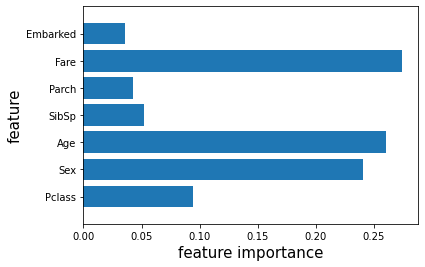

In [94]:
aa = titanic_df.iloc[:,:-1]
aa

n_feature = aa.shape[1]
index = np.arange(n_feature)

plt.barh(index, randomforest_best.feature_importances_, align='center')
plt.yticks(index, aa.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

## 투표기반

In [95]:
from sklearn.datasets import make_moons

X1, y1 = make_moons(n_samples=500, noise=0.30, random_state=1229)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=1229)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # 배우지 않은 내용

log_clf = LogisticRegression(random_state=1229)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=1229)
svm_clf = SVC(gamma="scale", random_state=1229)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [97]:
voting_clf.fit(X1_train, y1_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1229)),
                             ('rf', RandomForestClassifier(random_state=1229)),
                             ('svc', SVC(random_state=1229))])

In [98]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)
    print(clf.__class__.__name__, accuracy_score(y1_test, y1_pred))
    
# hard voting

LogisticRegression 0.824
RandomForestClassifier 0.936
SVC 0.888
VotingClassifier 0.896


In [99]:
print('Train Data')
print('정확도: ', round(accuracy_score(y1_train, voting_clf.predict(X1_train)),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y1_test, voting_clf.predict(X1_test)),3))

Train Data
정확도:  0.917
Test Data
정확도:  0.896


In [100]:
log_clf = LogisticRegression(solver="lbfgs", random_state=1229)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=1229)
tree = DecisionTreeClassifier()
knn =KNeighborsClassifier()
svm_clf = SVC(gamma="scale", probability=True, random_state=1229)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('tree', tree), ('knn', knn)],
    voting='soft')
voting_clf.fit(X1_train, y1_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1229)),
                             ('rf', RandomForestClassifier(random_state=1229)),
                             ('svc', SVC(probability=True, random_state=1229)),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [101]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X1_train, y1_train)
    y_pred = clf.predict(X1_test)
    print(clf.__class__.__name__, accuracy_score(y1_test, y1_pred))
    
# soft voting

LogisticRegression 0.896
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.896


In [102]:
print('Train Data')
print('정확도: ', round(accuracy_score(y1_train, voting_clf.predict(X1_train)),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y1_test, voting_clf.predict(X1_test)),3))

Train Data
정확도:  0.957
Test Data
정확도:  0.928


## 배깅

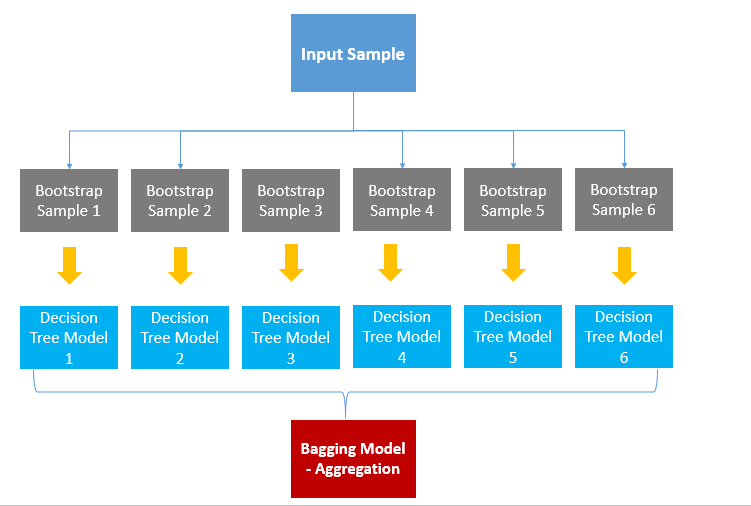

In [103]:
from sklearn.ensemble import BaggingClassifier

In [104]:
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn

In [105]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=1229), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=1229, n_jobs=-1)

# 중복 허용하여 무작위로 선택된 100개의 샘플로 훈련 (bootstrap=False시 페이스팅)

bag_clf.fit(X_train, y_train)
test_pred_bagging = bag_clf.predict(X_test)

In [106]:
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_bagging),3))
# 기존 값 80.9%

Test Data
정확도:  0.82


In [107]:
bag_clf_oob = BaggingClassifier(
    DecisionTreeClassifier(random_state=1229), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=1229, n_jobs=-1)
bag_clf_oob.fit(X_train, y_train)
bag_clf_oob.oob_score_

0.8129395218002813

In [108]:
test_pred_bagging_oob = bag_clf_oob.predict(X_test)
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_bagging_oob),3))

Test Data
정확도:  0.798


In [109]:
bag_clf_oob.oob_decision_function_

array([[0.84946237, 0.15053763],
       [0.33522727, 0.66477273],
       [0.97752809, 0.02247191],
       ...,
       [0.54519774, 0.45480226],
       [0.00651769, 0.99348231],
       [0.07428571, 0.92571429]])

### iris 데이터 bagging 진행

In [110]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris,
                                                    y_iris,
                                                    test_size=0.2,
                                                    random_state=1229)

In [111]:
bag_clf.fit(X_iris_train, y_iris_train)

train_pred_bag = bag_clf.predict(X_iris_train)
test_pred_bag = bag_clf.predict(X_iris_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_iris_train, train_pred_bag),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_iris_test, test_pred_bag),3))

Train Data
정확도:  1.0
Test Data
정확도:  1.0


## 부스팅

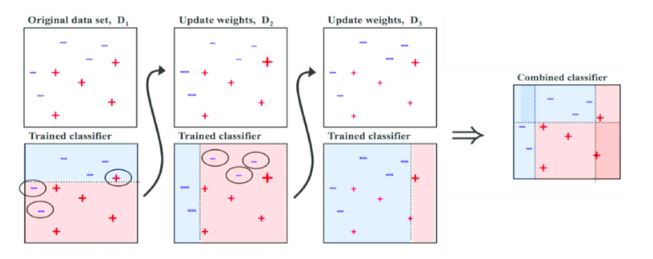

In [112]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi

In [114]:
Ada = AdaBoostClassifier(n_estimators=100,
                        learning_rate=1)
Ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [115]:
train_pred_Ada = Ada.predict(X_train)
test_pred_Ada = Ada.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_Ada),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_Ada),3))

Train Data
정확도:  0.848
Test Data
정확도:  0.798


### iris data adaboosting 진행

In [116]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris,
                                                    y_iris,
                                                    test_size=0.2,
                                                    random_state=1229)

In [117]:
Ada.fit(X_iris_train,y_iris_train)

train_pred = Ada.predict(X_iris_train)
test_pred = Ada.predict(X_iris_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_iris_train, train_pred),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_iris_test, test_pred),3))

Train Data
정확도:  0.942
Test Data
정확도:  0.967


In [118]:
start = time.time()  # 시작 시간 저장

param_grid = [
    {'n_estimators': [100,200,300,400,500], 'learning_rate': [5,1,0.1]},
  ]

Ada_grid = AdaBoostClassifier(random_state=1229)

grid_search = GridSearchCV(Ada_grid, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X, y)

print("time :", time.time() - start)  # 실행 시간 = 현재시각 - 시작시간 

time : 26.49921679496765


In [119]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'learning_rate': 1, 'n_estimators': 400}
AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=1229)


In [120]:
Ada_best = AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=1229)
Ada_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=400, random_state=1229)

In [121]:
train_pred_Ada_best = Ada_best.predict(X_train)
test_pred_Ada_best = Ada_best.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_Ada_best),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_Ada_best),3))

Train Data
정확도:  0.876
Test Data
정확도:  0.781


In [122]:
print("특성 중요도 : ",Ada_best.feature_importances_)

특성 중요도 :  [0.0275 0.0175 0.24   0.015  0.005  0.6875 0.0075]


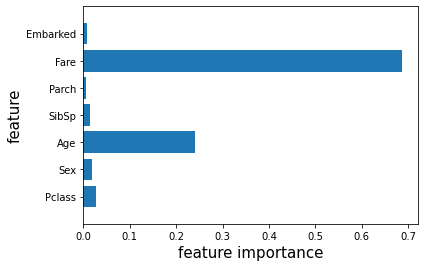

In [123]:
aa = titanic_df.iloc[:,:-1]
aa

n_feature = aa.shape[1]
index = np.arange(n_feature)

plt.barh(index, Ada_best.feature_importances_, align='center')
plt.yticks(index, aa.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

In [124]:
print('KNN(5) 정확도: ', round(accuracy_score(y_test, test_pred_knn),3))
print('Logistic Regression 정확도: ', round(accuracy_score(y, pred_logistic),3))
print('Tree 정확도: ', round(accuracy_score(y_test, test_pred_tree),3))
print('Tree 정확도: ', round(accuracy_score(y_test, test_pred_tree),3))
print('Tree(Entropy) 정확도: ', round(accuracy_score(y_test, test_pred_entropy),3))
print('Tree(Best) 정확도: ', round(accuracy_score(y_test, test_pred_best),3))
print('RandomForest 정확도: ', round(accuracy_score(y_test, test_pred_randomforest),3))
print('RandomForest(Best) 정확도: ', round(accuracy_score(y_test, test_pred_randomforest_best),3))
print('Bagging 정확도: ', round(accuracy_score(y_test, test_pred_bagging),3))
print('Bagging(oob) 정확도: ', round(accuracy_score(y_test, test_pred_bagging_oob),3))
print('AdaBoosting 정확도: ', round(accuracy_score(y_test, test_pred_Ada),3))
print('AdaBoosting(Best) 정확도: ', round(accuracy_score(y_test, test_pred_Ada_best),3))

# 어느 분류분석이 좋은지는 도메인 지식, 하이퍼파라미터 설정 등에 따라 달라질 수 있음

KNN(5) 정확도:  0.685
Logistic Regression 정확도:  0.802
Tree 정확도:  0.742
Tree(3) 정확도:  0.742
Tree(Entropy,4) 정확도:  0.848
Tree(Best) 정확도:  0.826
RandomForest 정확도:  0.82
RandomForest(Best) 정확도:  0.826
Bagging 정확도:  0.82
Bagging(oob) 정확도:  0.798
AdaBoosting 정확도:  0.798
AdaBoosting(Best) 정확도:  0.781


#### 추가

In [125]:
from sklearn.svm import SVC

In [126]:
svm = SVC()

In [127]:
svm.fit(X_train,y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred),3))

Train Data
정확도:  0.685
Test Data
정확도:  0.68


In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.82520863,  0.73534203, -0.59508164, ..., -0.47432585,
        -0.50023975, -0.56968402],
       [-1.57221121, -1.35991138,  0.63931116, ..., -0.47432585,
         0.78894661,  1.00313924],
       [ 0.82520863, -1.35991138, -0.28648344, ..., -0.47432585,
        -0.48664993, -0.56968402],
       ...,
       [ 0.82520863, -1.35991138,  0.02211476, ...,  2.00611934,
        -0.17408416, -0.56968402],
       [-1.57221121,  0.73534203, -0.28648344, ..., -0.47432585,
        -0.0422126 ,  1.00313924],
       [ 0.82520863,  0.73534203,  0.17641386, ..., -0.47432585,
        -0.49017322,  2.5759625 ]])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                      test_size = 0.2, random_state = 1229)

In [131]:
svm.fit(X_train,y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, y_train_pred),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, y_test_pred),3))

Train Data
정확도:  0.842
Test Data
정확도:  0.854
